In [1]:
import pandas as pd

In [2]:
dfs = pd.read_html("Data_View.html",index_col='Unnamed: 0')

In [3]:
dfs[6].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1418 entries, 0 to 1417
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DEVICEID                  1418 non-null   int64  
 1   FROMTIME                  1418 non-null   object 
 2   TOTIME                    1418 non-null   object 
 3   INTERVAL                  1418 non-null   float64
 4   LANEID                    1418 non-null   int64  
 5   COUNT                     1418 non-null   float64
 6   REGULARCOUNT              1418 non-null   float64
 7   LARGECOUNT                1418 non-null   float64
 8   FLOW                      1418 non-null   float64
 9   ARITHMETIC_AVERAGE_SPEED  1418 non-null   float64
 10  HARMONIC_AVERAGE_SPEED    1418 non-null   float64
 11  TURN                      1418 non-null   object 
dtypes: float64(7), int64(2), object(3)
memory usage: 144.0+ KB


In [4]:
df = dfs[6]

In [5]:
df['DEVICEID'].unique()

array([3603, 3604, 3605, 3606, 3607, 3608, 3609, 3610], dtype=int64)

In [6]:
df

,DEVICEID,FROMTIME,TOTIME,INTERVAL,LANEID,COUNT,REGULARCOUNT,LARGECOUNT,FLOW,ARITHMETIC_AVERAGE_SPEED,HARMONIC_AVERAGE_SPEED,TURN
0,3603,2019-07-05 07:00:00,2019-07-05 07:01:00,60.0,2,1.0,0.0,1.0,60.0,11.465755,11.465755,SR
1,3603,2019-07-05 07:00:00,2019-07-05 07:01:00,60.0,1,1.0,1.0,0.0,60.0,35.414622,35.414622,SL
2,3603,2019-07-05 07:01:00,2019-07-05 07:02:00,60.0,2,6.0,6.0,0.0,360.0,32.754597,32.545972,SR
3,3603,2019-07-05 07:01:00,2019-07-05 07:02:00,60.0,1,4.0,4.0,0.0,240.0,35.540343,35.536300,SL
4,3603,2019-07-05 07:02:00,2019-07-05 07:03:00,60.0,1,2.0,2.0,0.0,120.0,10.389970,9.688504,SL
...,...,...,...,...,...,...,...,...,...,...,...,...
1413,3610,2019-07-05 08:54:00,2019-07-05 08:55:00,60.0,1,6.0,5.0,1.0,360.0,32.058877,31.294899,SLR
1414,3610,2019-07-05 08:55:00,2019-07-05 08:56:00,60.0,1,3.0,2.0,1.0,180.0,30.437353,28.439721,SLR
1415,3610,2019-07-05 08:56:00,2019-07-05 08:57:00,60.0,1,9.0,9.0,0.0,540.0,26.531446,25.440247,SLR
1416,3610,2019-07-05 08:57:00,2019-07-05 08:58:00,60.0,1,4.0,4.0,0.0,240.0,23.690624,19.002454,SLR


In [7]:
content = "2019-07-05 08:54:00"

In [8]:
sec = 27

In [9]:
int(sec / 5) * 5

25

In [10]:
content.split(":")

['2019-07-05 08', '54', '00']

In [11]:
import re
re.findall("\d",content)

['2', '0', '1', '9', '0', '7', '0', '5', '0', '8', '5', '4', '0', '0']

In [12]:
def change_time_span(x:str):
    """
    将分钟转换为5分钟时间间隔
    """
    time_array = x.split(":")

    min_str = time_array[-2] #取出分钟字符串

    min_idx = int(int(min_str) / 5) #计算当前分钟是第几个5分钟索引

    real_min =str(min_idx * 5) #属于哪个5分钟

    if len(real_min) < 2:
        real_min = '0' + real_min

    time_array[-2] = real_min

    return ":".join(time_array)



In [13]:
change_time_span("2019-07-05 08:06:00")

'2019-07-05 08:05:00'

In [14]:
df['FROMTIME'] = df['FROMTIME'].apply(lambda x:change_time_span(x))

In [15]:
df['FROMTIME']

0       2019-07-05 07:00:00
1       2019-07-05 07:00:00
2       2019-07-05 07:00:00
3       2019-07-05 07:00:00
4       2019-07-05 07:00:00
               ...         
1413    2019-07-05 08:50:00
1414    2019-07-05 08:55:00
1415    2019-07-05 08:55:00
1416    2019-07-05 08:55:00
1417    2019-07-05 08:55:00
Name: FROMTIME, Length: 1418, dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1418 entries, 0 to 1417
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DEVICEID                  1418 non-null   int64  
 1   FROMTIME                  1418 non-null   object 
 2   TOTIME                    1418 non-null   object 
 3   INTERVAL                  1418 non-null   float64
 4   LANEID                    1418 non-null   int64  
 5   COUNT                     1418 non-null   float64
 6   REGULARCOUNT              1418 non-null   float64
 7   LARGECOUNT                1418 non-null   float64
 8   FLOW                      1418 non-null   float64
 9   ARITHMETIC_AVERAGE_SPEED  1418 non-null   float64
 10  HARMONIC_AVERAGE_SPEED    1418 non-null   float64
 11  TURN                      1418 non-null   object 
dtypes: float64(7), int64(2), object(3)
memory usage: 144.0+ KB


In [17]:
df_span = df.loc[:,['DEVICEID','FROMTIME','COUNT']].groupby(['DEVICEID','FROMTIME']).sum()
df_span

COUNT
DEVICEID FROMTIME                  
3603     2019-07-05 07:00:00   24.0
         2019-07-05 07:05:00   39.0
         2019-07-05 07:10:00   38.0
         2019-07-05 07:15:00   45.0
         2019-07-05 07:20:00   47.0
...                             ...
3610     2019-07-05 08:35:00   22.0
         2019-07-05 08:40:00   23.0
         2019-07-05 08:45:00   21.0
         2019-07-05 08:50:00   30.0
         2019-07-05 08:55:00   23.0

[192 rows x 1 columns]

In [18]:
df_span.query('DEVICEID == 3603').values.reshape(-1,)

array([24., 39., 38., 45., 47., 51., 52., 75., 82., 83., 55., 88., 75.,
       68., 51., 76., 55., 62., 59., 56., 56., 55., 69., 53.])

In [19]:
s = pd.Series(df_span.query('DEVICEID == 3603').values.reshape(-1,))
s

0     24.0
1     39.0
2     38.0
3     45.0
4     47.0
5     51.0
6     52.0
7     75.0
8     82.0
9     83.0
10    55.0
11    88.0
12    75.0
13    68.0
14    51.0
15    76.0
16    55.0
17    62.0
18    59.0
19    56.0
20    56.0
21    55.0
22    69.0
23    53.0
dtype: float64

In [20]:
%matplotlib inline

<Axes: >

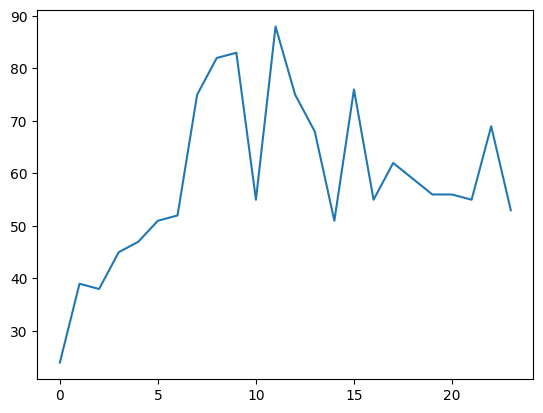

In [21]:
s.plot()

In [22]:
from sklearn.model_selection import train_test_split
# 划分数据集
train_data=s[:-20]
test_data = s[4:]

In [23]:
from statsmodels.tsa.ar_model import AutoReg

# 创建自回归模型并训练
model = AutoReg(s, lags=4)
model_fit = model.fit()

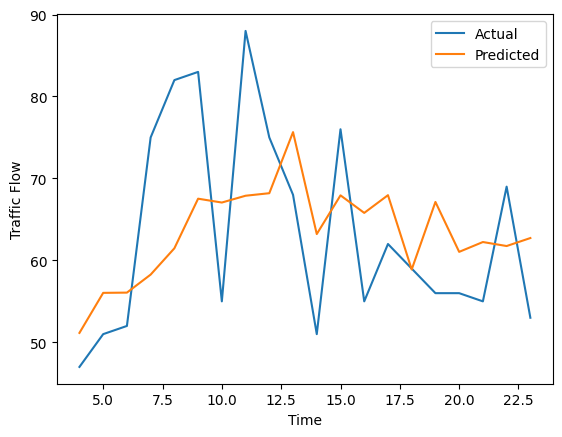

In [24]:
from matplotlib import pyplot as plt

# 进行预测
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# 可视化结果
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Traffic Flow')
plt.legend()
plt.show()

In [25]:
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

# 创建一个SVR模型
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.1)

In [26]:
# 定义特征窗口长度
window_len = 5

# 生成训练集
train_x, train_y = [], []
for i in range(window_len, len(s)):
    train_x.append(s[i-window_len:i])
    train_y.append(s[i])
train_x = np.array(train_x)
train_y = np.array(train_y)

# 生成测试集
test_x, test_y = [], []
for i in range(len(s)-window_len, len(s)):
    test_x.append(s[i-window_len:i])
    test_y.append(s[i])
test_x = np.array(test_x)
test_y = np.array(test_y)


In [27]:
from sklearn import svm

# 训练 SVM 模型
clf = svm.SVR(kernel='linear') # 定义 SVM 模型
clf.fit(train_x, train_y) # 训练 SVM 模型

SVR(kernel='linear')

In [28]:
test_x

array([[51., 76., 55., 62., 59.],
       [76., 55., 62., 59., 56.],
       [55., 62., 59., 56., 56.],
       [62., 59., 56., 56., 55.],
       [59., 56., 56., 55., 69.]])

In [29]:
prediction = clf.predict(test_x)

In [30]:
prediction

array([65.96769423, 55.5374301 , 60.71655108, 57.3816414 , 56.35052985])

In [31]:
test_y

array([56., 56., 55., 69., 53.])

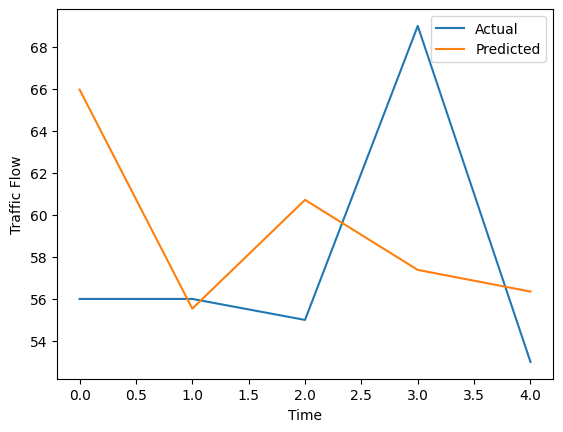

In [32]:
# 可视化结果
plt.plot(test_y, label='Actual')
plt.plot(prediction, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Traffic Flow')
plt.legend()
plt.show()